In [1]:
import numpy as np

x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

In [2]:
# creating bins code
Ntrain = x_train.shape[0]

# Ntrain = 10
bin_max = 50
bin_min = -50
bin_size = 2
bin_num = int((bin_max-bin_min)/bin_size)

x_train_bin_s = np.zeros((Ntrain,bin_num))

index = 0
ex = 0

# training data processing
for k in range(Ntrain):
    if np.mod(k+1,100) == 0:
        print('Training Generation: ',k+1,'/',Ntrain)
    for i in range(x_train.shape[1]-1):
        if x_train[k,i]!=x_train[k,i+1]:
            for j in range(bin_num):
                if x_train[k,i] >= (bin_size*j+bin_min) and x_train[k,i] <= (bin_size*(j+1)+bin_min):
                    x_train_bin_s[k,j] += 1


Training Generation:  100 / 1000
Training Generation:  200 / 1000
Training Generation:  300 / 1000
Training Generation:  400 / 1000
Training Generation:  500 / 1000
Training Generation:  600 / 1000
Training Generation:  700 / 1000
Training Generation:  800 / 1000
Training Generation:  900 / 1000
Training Generation:  1000 / 1000


[0.         2.37715066]


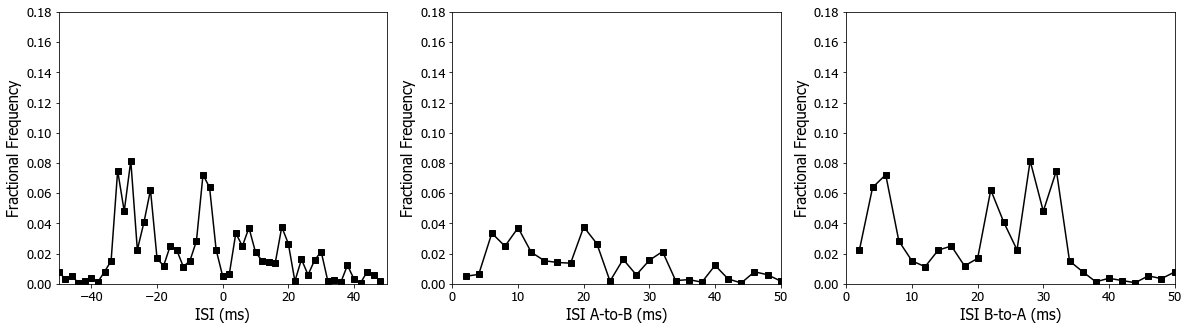

In [4]:
import matplotlib.pyplot as plt

x_train_bin_norm = np.divide(x_train_bin_s,np.sum(x_train_bin_s,axis=1,keepdims=True)*np.ones(x_train_bin_s.shape))
x_train_bin_norm_r = x_train_bin_norm[:,25:]
x_train_bin_norm_l = np.fliplr(x_train_bin_norm[:,:-25])

tbin = np.arange(bin_min,bin_max,bin_size)

ex = 1
print(y_train[ex])

font = {'family' : 'Tahoma',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)


# plt.rc('font', family='Verdana')
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rc('text', usetex=False)


plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(tbin,x_train_bin_norm[ex],'ks-')
plt.xlabel('ISI (ms)')
plt.ylabel('Fractional Frequency')
plt.xlim([-50,50])
plt.ylim([0,0.18])

plt.subplot(1,3,2)
plt.plot(tbin[25:]+2,x_train_bin_norm_r[ex],'ks-')
plt.xlabel('ISI A-to-B (ms)')
plt.ylabel('Fractional Frequency')
plt.xlim([0,50])
plt.ylim([0,0.18])

plt.subplot(1,3,3)
plt.plot(tbin[25:]+2,x_train_bin_norm_l[ex],'ks-')
plt.xlabel('ISI B-to-A (ms)')
plt.ylabel('Fractional Frequency')
plt.xlim([0,50])
plt.ylim([0,0.18])


plt.show()

In [15]:
print(X.shape)

(1000, 50)


In [16]:
# divide in half
X = x_train_bin_s
Y = y_train

Xn = np.zeros((int(2*X.shape[0]),int(X.shape[1]/2)))
Yn = np.zeros((int(2*X.shape[0]),int(Y.shape[1]/2)))
Xn[:X.shape[0],:] = X[:,25:]
Yn[:X.shape[0],:] = (Y[:,:1]>1)*1
Xn[X.shape[0]:,:] = np.fliplr(X[:,:25])
Yn[X.shape[0]:,:] = (Y[:,1:]>1)*1

Xones = np.ones((Xn.shape[0],Xn.shape[1]+1))
Xones[:,1:] = Xn
print(Xones.shape)
print(Xones[1])

(2000, 26)
[1.000e+00 1.880e+02 2.360e+02 1.269e+03 9.420e+02 1.404e+03 7.910e+02
 5.780e+02 5.340e+02 5.170e+02 1.425e+03 1.004e+03 6.600e+01 6.130e+02
 2.240e+02 5.900e+02 8.080e+02 8.000e+01 1.050e+02 4.100e+01 4.620e+02
 1.210e+02 2.100e+01 3.010e+02 2.270e+02 6.900e+01]


In [31]:
B = np.zeros((Xones.shape[1],1))
P = np.zeros((Xones.shape[0],1))
P = np.divide(1,1+np.exp(-np.dot(Xones,B)))
V = np.zeros((Xones.shape[0],Xones.shape[0]))
np.fill_diagonal(V, P)

d = 0

for i in range(1000):
    P = np.divide(1,1+np.exp(-np.dot(Xones,B)))
    np.fill_diagonal(V, P)
    B = B + np.dot(np.linalg.inv(np.dot(np.dot(Xones.T,V),Xones))-np.multiply(d,np.eye(Xones.shape[1])),np.dot(Xones.T,Yn-P) - np.multiply(d,B))

print(B)

[[-1.16553160e+01]
 [ 3.13407831e-03]
 [ 4.31279754e-03]
 [ 2.23807678e-03]
 [ 9.24208386e-04]
 [-2.43930607e-04]
 [ 5.05016448e-04]
 [ 1.37247446e-04]
 [ 3.84410451e-04]
 [-4.57208026e-05]
 [-1.23639031e-04]
 [-2.54464638e-04]
 [-5.11783593e-04]
 [-9.04606512e-05]
 [ 1.35671494e-05]
 [ 1.62814880e-04]
 [ 2.53888547e-04]
 [-2.28708046e-04]
 [-1.22555829e-03]
 [-3.25648967e-04]
 [-1.66389155e-03]
 [ 5.53524242e-04]
 [-2.72138420e-04]
 [ 8.45059992e-04]
 [ 1.35079980e-04]
 [-8.71865799e-04]]


In [32]:
P = np.divide(1,1+np.exp(-np.dot(Xones,B)))
print('Accuracy:',100*np.average((P>0.5)*1 == Yn),'%')

Accuracy: 97.6 %
